In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import tensorflow_datasets as tfds

# 데이터 불러오기

In [2]:
# train, test 데이터 불러오기

train_path = './data/train.csv' # 필요에 따라 변경하세요.
# test_path = './data/test.csv' # 필요에 따라 변경하세요.
train_normal_data_path = './data/normal_raw_conversations.csv'

def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

train_df = load_data(train_path)
# test_df = load_data(test_path)
normal_df = load_data(train_normal_data_path)

In [3]:
# 데이터 확인
train_df.shape, normal_df.shape

((3950, 3), (2023, 3))

In [4]:
train_df.head()

idx      class                                       conversation
0    0      협박 대화  지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1    1      협박 대화  길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2    2  기타 괴롭힘 대화  너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3    3      갈취 대화  어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4    4      갈취 대화  저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...

In [5]:
normal_df.head()

class                                       conversation  class_encoded
0  일반 대화  언니 명랑 핫도그 먹어 봤어?\n웅 먹은 지 한참 됐어\n나 오늘 먹었는데 진짜 존...              4
1  일반 대화  언니 지금 자취하고 있어?\n웅 자취비 장난 아님\n키키 맞아,\n나도 지금 서울살...              4
2  일반 대화  언니는 차 멀미 안 해?\n나 멀미는 없더라\n너 있어?\n나 진짜 장난 아니야\n...              4
3  일반 대화  언니 지금 회사에서 어떤 일 하고 있어?\n나 코디하자나\n스트레스 장난 아님\n와...              4
4  일반 대화  언니 남동생이나 오빠 있엉?\n아니\n나 외동 키키 왜?\n나는 언니 한 명 있는데...              4

In [6]:
normal_df = normal_df[['class', 'conversation']]
normal_df.head()

class                                       conversation
0  일반 대화  언니 명랑 핫도그 먹어 봤어?\n웅 먹은 지 한참 됐어\n나 오늘 먹었는데 진짜 존...
1  일반 대화  언니 지금 자취하고 있어?\n웅 자취비 장난 아님\n키키 맞아,\n나도 지금 서울살...
2  일반 대화  언니는 차 멀미 안 해?\n나 멀미는 없더라\n너 있어?\n나 진짜 장난 아니야\n...
3  일반 대화  언니 지금 회사에서 어떤 일 하고 있어?\n나 코디하자나\n스트레스 장난 아님\n와...
4  일반 대화  언니 남동생이나 오빠 있엉?\n아니\n나 외동 키키 왜?\n나는 언니 한 명 있는데...

In [7]:
# train data 와 normal 데이터 합치기
def concat_train_normal(df_list):
    train_df = pd.concat(df_list, ignore_index=True)
#     train_df.drop(['idx'], axis=1, inplace=True)
    train_df.reset_index(inplace=True)

    return train_df

In [8]:
train_df = concat_train_normal([train_df, normal_df])
train_df.head()

index  idx      class                                       conversation
0      0  0.0      협박 대화  지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1      1  1.0      협박 대화  길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2      2  2.0  기타 괴롭힘 대화  너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3      3  3.0      갈취 대화  어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4      4  4.0      갈취 대화  저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...

In [9]:
train_df.tail()

index  idx  class                                       conversation
5968   5968  NaN  일반 대화  미국은 백신 6-11세 권고한대\n헐 어린애들 우찌되면 어떻게\n아니\n애기들이 맞...
5969   5969  NaN  일반 대화  우리는 항상 다이어트 중!\n맞아\n1년 동안 계속\n키키 다이어트 여친도 매년.....
5970   5970  NaN  일반 대화  치아 보험 들어야 하나\n치아 보험 애매하당\n치아 보험은 뭔가 ㅠㅠ\n오빠는 벌써...
5971   5971  NaN  일반 대화  당근에는 없는 게 없어...\n맞아\n아주 용이해 하하\n당근 들어가면... 뭐든 ...
5972   5972  NaN  일반 대화  오빠 야구 중계 좀\n지금 현재 8회말 1–0\n키키 지금 어떻게 되고 있나여 키키...

In [10]:
train_df.shape

(5973, 4)

In [11]:
train_df = train_df.drop_duplicates(subset=['conversation'])
train_df.shape

(5869, 4)

In [12]:
train_df = train_df.sample(frac=1, random_state=None).reset_index(drop=True)
train_df.head()

index     idx        class  \
0   1573  1573.0  직장 내 괴롭힘 대화   
1   5689     NaN        일반 대화   
2   2787  2787.0        협박 대화   
3    847   847.0        갈취 대화   
4   5661     NaN        일반 대화   

                                        conversation  
0  박사원은 군대를 안갔다와서 일을 이따구로 하나?\n아닙니다.\n넌 진짜 할 줄 아는...  
1  군대도 주 52시간 하나 키키\n군인 복지 좀 줄여야 해 내 생각엔\n키키 군인 복...  
2  이 씨발놈 아직 정신 못차렸네\n좋게 말로 하니까 말을 들어처먹질않네\n미안해\n몇...  
3  야 좋은말로 할때 놓고 가라\n 이거 엄마가 사주신거에요\n아니 그냥 빌리겠다고 빨...  
4  ** 행님 집에 왔음?\n행님은 언제 오심?\n행님 오늘 퇴근 늦을 거래\n행님 오...

In [13]:
val_df = train_df.iloc[:5869//10, ]
test_df = train_df.iloc[5869//10:5869//10*2, ]
train_df = train_df.iloc[5869//10*2:, ]
train_df.shape, val_df.shape, test_df.shape

((4697, 4), (586, 4), (586, 4))

In [14]:
# train, test 데이터 불러오기
train_path1 = './augment data/augmented_inserted_text_data.csv' # 필요에 따라 변경하세요.
# train_path2 = './augment data/augmented_replaced_text_data.csv' # 필요에 따라 변경하세요.
# train_path3 = './augment data/raw_data.csv' # 필요에 따라 변경하세요.
test_path = './data/test.csv' # 필요에 따라 변경하세요.

def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

train_df1 = load_data(train_path1)
# train_df2 = load_data(train_path2)
# train_df3 = load_data(train_path3)
# test_df = load_data(test_path)
# normal_df = load_data(train_normal_data_path)

In [15]:
train_df1 = train_df1[~(train_df1['class_encoded']==4)]
train_df1.tail()

class  class_encoded  \
3841    기타 괴롭힘 대화              3   
3842        갈취 대화              1   
3843  직장 내 괴롭힘 대화              2   
3844        갈취 대화              1   
3845  직장 내 괴롭힘 대화              2   

                                           conversation  
3841  " 준하야 넌 대가리가 왜이렇게 크냐? 내 머리가 뭐. 밥먹으면 대가리만 크냐 너는...  
3842  내가 지금 너 아들 김길준을 데리고 있어. 살리고 싶으면 계좌에 1억만 더 더 보내...  
3843  나는 씨 같은 사람 보면 참 신기하더라. 어떻게 또 그렇게 저렇게 살지. 너 왜 그...  
3844  누구맘대로 여기서 장사하래? 이게 무슨일입니까? 남의 구역에서 장사하려면 자릿세를 ...  
3845  희정씨. 네 네? 주말에 시간이 넘쳐나나봐 갑자기 왜그러세요? 손이 빤짝빤짝 네일했...

In [16]:
train_df = concat_train_normal([train_df, train_df1])
train_df.shape, train_df.head()

((8543, 6),
    level_0   index     idx        class  \
 0        0  2292.0  2292.0    기타 괴롭힘 대화   
 1        1  5516.0     NaN        일반 대화   
 2        2  1799.0  1799.0        협박 대화   
 3        3  4468.0     NaN        일반 대화   
 4        4   334.0   334.0  직장 내 괴롭힘 대화   
 
                                         conversation  class_encoded  
 0  야 너 이리와봐\n응? 왜?\n너 그 안경 뭐냐?\n왜.? 이상해?\n어 존나 이상...            NaN  
 1  정신 건강은 눈빛에서 나와\n눈빛이 아주 중요하지\n키키 맞음...\n지치면 눈빛이...            NaN  
 2  지금 주소를 보낼테니 당장 내가 있는 곳으로 와.\n 싫어. 지금 장난해? 내가 거...            NaN  
 3  전세 사기 당했다고?\n전세 사기 누구!?\n맞아 아까 그거 뭐야?\n그 ** 언니...            NaN  
 4  오늘까지 자료 좀 찾아줘\n 자료요? 어떤 자료 말씀이시죠? 아까 말씀하신 자료는 ...            NaN  )

In [17]:
train_df = train_df[['conversation', 'class']]
val_df = val_df[['conversation', 'class']]
test_df = test_df[['conversation', 'class']]

train_df.shape, val_df.shape, test_df.shape

((8543, 2), (586, 2), (586, 2))

In [18]:
# 클래스 숫자로 변환
def class_encoding(train_df, class_mapping):
    train_df['class_encoded'] = train_df['class'].replace(class_mapping)
    
    return train_df

# 클래스 매핑 딕셔너리 정의
class_mapping = {
    "협박 대화": 0,
    "갈취 대화": 1,
    "직장 내 괴롭힘 대화": 2,
    "기타 괴롭힘 대화": 3,
    "일반 대화": 4
}

train_df = class_encoding(train_df, class_mapping)
val_df = class_encoding(val_df, class_mapping)
test_df = class_encoding(test_df, class_mapping)

# 변환된 데이터 확인
train_df.shape, val_df.shape, test_df.shape

((8543, 3), (586, 3), (586, 3))

In [19]:
train_df.head(10)

conversation        class  \
0  야 너 이리와봐\n응? 왜?\n너 그 안경 뭐냐?\n왜.? 이상해?\n어 존나 이상...    기타 괴롭힘 대화   
1  정신 건강은 눈빛에서 나와\n눈빛이 아주 중요하지\n키키 맞음...\n지치면 눈빛이...        일반 대화   
2  지금 주소를 보낼테니 당장 내가 있는 곳으로 와.\n 싫어. 지금 장난해? 내가 거...        협박 대화   
3  전세 사기 당했다고?\n전세 사기 누구!?\n맞아 아까 그거 뭐야?\n그 ** 언니...        일반 대화   
4  오늘까지 자료 좀 찾아줘\n 자료요? 어떤 자료 말씀이시죠? 아까 말씀하신 자료는 ...  직장 내 괴롭힘 대화   
5  너 바람피는거 다 알고 있어\n 어떤 근거로 그러시는거죠?\n 너 바람피는 현장을 ...        협박 대화   
6  너는 남자친구에 대한 환상이 있어?\n이상형이 어떻게 돼?\n나는 예의만 바르면 다...        일반 대화   
7  돼지야 너 돼지잖아. 돼지야 오늘 꿀꿀소리 내가 따줄게\n갑자기? 왜. 우리 그동안...        협박 대화   
8  나 틴트 한번만 빌려줄 수 있어?\n 아 틴트 같이 쓰면 안좋대\n 엥 그거 한번 ...        갈취 대화   
9  운동화도 점점 비싸지지 않냐...\n응 진짜 물가 뭐냐...\n마즘...\n20이 ...        일반 대화   

   class_encoded  
0              3  
1              4  
2              0  
3              4  
4              2  
5              0  
6              4  
7              0  
8              1  
9              4

In [20]:
val_df.head(10)

conversation        class  \
0  박사원은 군대를 안갔다와서 일을 이따구로 하나?\n아닙니다.\n넌 진짜 할 줄 아는...  직장 내 괴롭힘 대화   
1  군대도 주 52시간 하나 키키\n군인 복지 좀 줄여야 해 내 생각엔\n키키 군인 복...        일반 대화   
2  이 씨발놈 아직 정신 못차렸네\n좋게 말로 하니까 말을 들어처먹질않네\n미안해\n몇...        협박 대화   
3  야 좋은말로 할때 놓고 가라\n 이거 엄마가 사주신거에요\n아니 그냥 빌리겠다고 빨...        갈취 대화   
4  ** 행님 집에 왔음?\n행님은 언제 오심?\n행님 오늘 퇴근 늦을 거래\n행님 오...        일반 대화   
5  민아야 나 방과후비 혹시 대신 내줄 수 있어?\n갑자기? 안돼. 나 그 많은 돈 없...        갈취 대화   
6  어이 거기!\n네? 저요?\n그럼 거기 너 말고 또 누구 있어? 이리 와봐.\n왜 ...        갈취 대화   
7  언니 요즘에 여자가 군대를 가야하냐 말아야 하냐 되게 이슈잖아!\n웅 맞아\n왜 군...        일반 대화   
8  나 오늘 카드값 얼마 내야 하는지 문자가 왔어,\n아 그날이 제일 긴장되는 날이긴 ...        일반 대화   
9  어우 정대리 이번에도 참 글래머 스럽게 입고왔네\n네? 지금 저한태 하신말이세요?\...  직장 내 괴롭힘 대화   

   class_encoded  
0              2  
1              4  
2              0  
3              1  
4              4  
5              1  
6              1  
7              4  
8              4  
9              2

In [21]:
test_df.head(10)

conversation        class  \
586  위에 보고를 그딴식으로 하면 어떡해? 나 엿먹이려고 작정했어? 미친거아니야?\n 그...        협박 대화   
587  푸핫 야 너 배좀 봐 밥이 들어가니?\n아 왜그래요\n아니 너만 보면 진짜 한심해서...    기타 괴롭힘 대화   
588  아무개씨 지금업무 다했어?\n다 끝나갑니다\n빨리빨리 안하고 느려터져서는\n죄송합니...  직장 내 괴롭힘 대화   
589  술 게임 재밋는데 ㅎ\n라이어게임하고싶당\n너 라이어 진짜 ㅜ 장해...\n오 나 ...        일반 대화   
590  강아지 왜 안 키워?\n강아지 털 알러지 때문에\n냄새 마니 나자너\n강아지는  사...        일반 대화   
591  자 이번 달 이벤트 아이디어 회의 좀 해보자구\n팀장님! 저는 안을 생각해 봤는데요...  직장 내 괴롭힘 대화   
592  너 이번 방학 때 쌍꺼풀 수술 하고왔지?\n아닌데?\n아니긴 뭐가 아니야. 눈이 이...    기타 괴롭힘 대화   
593  책임자 바꿔.\n 아 고객님 저한테 말씀하시면.\n 네가 뭘 안다고 그래?\n 고객...    기타 괴롭힘 대화   
594  나 좀 건강한 듯\n감기몸살 거의 다 나음\n키키 그래 보이더라 풍채가 당당\n피 ...        일반 대화   
595  저기 김씨\n 아 네 대표님 !\n 혹시 주말에 시간 돼 ?\n 네? 무슨일로 그러...  직장 내 괴롭힘 대화   

     class_encoded  
586              0  
587              3  
588              2  
589              4  
590              4  
591              2  
592              3  
593              3  
594              4  
595              2

In [22]:
train_df = train_df.drop_duplicates(subset=['conversation'])
train_df = train_df.sample(frac=1, random_state=None).reset_index(drop=True)

In [23]:
train_df.shape, val_df.shape, test_df.shape

((8543, 3), (586, 3), (586, 3))

# 전처리

In [24]:
# 전처리 함수
def preprocess_sentence(sentence):
  # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
  sentence = sentence.lower().strip()

  # 개행 문자("\n")를 공백으로 변환
  sentence = re.sub(r"\n", " ", sentence)
    
  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # ?.!, 앞뒤로 공백 추가
  sentence = re.sub(r'[" "]+', " ", sentence) # 연속된 공백 한개의 공백으로

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^a-zA-Z\u1100-\u11FF\uAC00-\uD7AF.,?!]", " ", sentence)
  sentence = sentence.strip()
  return sentence

In [25]:
conversation = train_df['conversation'].apply(preprocess_sentence)
conversation

0       여어 야 너 랑 만나지 ? 아 아 . 아 어 . 그렇게 안 됐어 . 하아 너 진짜 ...
1       아파트에서 할로윈 파티 했음 . . . 그니까 여기 하더라 하하 키키 아 진짜 애기...
2       여기가 어딘가요 ? 야 있는 돈 다 내놔 . 맞기 싫으면 아니 댁은 누구신대 다짜고...
3       요즘 예능이 너무 재밌어 이번 년도 연예대상은 누가 받을까 무슨 예능이 요즘 대세니...
4       핸드크림 바르시는 분 겨울에는 필수템이지   저여 안 그럼 다 갈라짐 . . . 핸...
                              ...                        
8538    출출하다 . 라면 먹어야지 저렇게 라면 먹으니깐 살찌지 아니 배고파서 먹는건데 그만...
8539    어디서 자꾸 이상한 냄새 나 어디 ? ? ? 유리야 너 입에서 나는 것도 같아 내 ...
8540    야 나 돈 좀 빌려주라 왜 ? 무슨일이야 ? 엄마가 아프신데 병원비 내야해 저번에도...
8541    당장 우리 아들과 헤어져 어머님 저 정말 그이를 사랑해요 ! . 나는 가난한 사람과...
8542    어이 이게 누구야 ? 네 돈 떼 먹고 두 다리 쫙 펴고 잘 살고 있었나 ? ? 어 ...
Name: conversation, Length: 8543, dtype: object

In [26]:
# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(conversation, target_vocab_size=2**11)

In [27]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size
print(VOCAB_SIZE)

2039


In [28]:
# 1998번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 1998번째 질문 샘플: {}'.format(tokenizer.encode(conversation[1998])))

정수 인코딩 후의 1998번째 질문 샘플: [34, 388, 171, 2, 126, 937, 238, 405, 1120, 1815, 750, 77, 39, 538, 1573, 68, 1782, 1177, 787, 1815, 1504, 1815, 729, 37, 1512, 81, 179, 981, 485, 1411, 1683, 1815, 468, 924, 1815, 765, 707, 812, 151, 341, 804, 1815, 13, 28, 176, 89, 802, 1640, 10, 142, 16, 2, 49, 740, 1641, 1, 135, 835, 1815, 74, 1544, 487, 364, 37, 1000, 738, 1815, 464, 1004, 734, 81, 487, 1815, 48, 128, 1106, 1815, 784, 74, 812, 16, 1172, 314, 240, 1287, 731]


In [29]:
# 원본 확인
conversation[1998].split()

['왜',
 '이러세요',
 '?',
 '이거',
 '놓으세요',
 '가방',
 '이리내',
 '안',
 '그러면',
 '죽여버리겠어',
 '진정하세요',
 '드릴게요',
 '드리면',
 '되잖아요',
 '빨리',
 '내놔',
 '좋은',
 '말로',
 '할때',
 '여기있어요',
 '그만',
 '놔주세요',
 '드렸잖아요',
 '너',
 '나들마트',
 '옆에',
 '살지',
 '?',
 '아니',
 '그걸',
 '어떻게',
 '.',
 '제발',
 '살려주세요',
 '만약',
 '신고한다면',
 '알아서',
 '생각해',
 '알겠어',
 '?',
 '!',
 '알았어요',
 '신고',
 '안할테니',
 '살려만주세요',
 '지켜볼거야',
 '꺼져',
 '!']

In [30]:
# 각 데이터의 토큰 개수 세기
temp = list(map(lambda x : len(x.split()), conversation))
temp[:5]

[225, 94, 56, 99, 96]

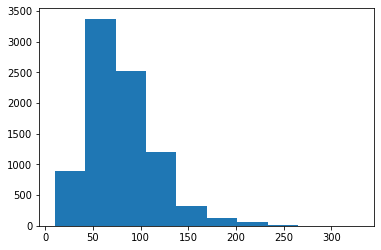

In [31]:
# 각 데이터의 토큰 개수 시각화 - histplot
import matplotlib.pyplot as plt

plt.hist(temp)
plt.show()

In [32]:
print(f'MAX_LENGTH = 200 일때: {np.array([True if x <= 200 else False for x in temp]).sum() / len(conversation) * 100:.2f} %')
print(f'MAX_LENGTH = 100 일때: {np.array([True if x <= 100 else False for x in temp]).sum() / len(conversation) * 100:.2f} %')
print(f'MAX_LENGTH = 50 일때: {np.array([True if x <= 50 else False for x in temp]).sum() / len(conversation) * 100:.2f} %')

MAX_LENGTH = 200 일때: 98.96 %
MAX_LENGTH = 100 일때: 75.71 %
MAX_LENGTH = 50 일때: 20.88 %


In [33]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 200
print(MAX_LENGTH)

200


In [34]:
# 최대 길이를 초과하는 샘플은 데이터 자르기, 패딩
def tokenize_and_filter(inputs):
  tokenized_inputs = list()
  
  for sentence in inputs:
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence = tokenizer.encode(sentence)

    # 최대 길이 200 까지만 데이터셋으로 사용
    if len(sentence) <= MAX_LENGTH:
      tokenized_inputs.append(sentence)
    
    else:
      tokenized_inputs.append(sentence[:MAX_LENGTH])
  
  # 최대 길이 200으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs

In [35]:
conversation = tokenize_and_filter(conversation)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 대화 샘플 개수: {}'.format(len(conversation)))

단어장의 크기 : 2039
필터링 후의 대화 샘플 개수: 8543


# 모델링 - transformer 인코딩 모델 밑바닥부터 구현하기

In [36]:
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

# 멀티 헤드 어텐션 구현하기
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs

# 패딩 마스크 구현 함수
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
#   attention = tf.keras.layers.Dropout(rate=dropout)(attention)
#   attention = tf.keras.layers.LayerNormalization(
#       epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
#   outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
#   outputs = tf.keras.layers.LayerNormalization(
#       epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 인코더 생성하기
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  outputs = PositionalEncoding(vocab_size, d_model)(embeddings)

#   outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [37]:
# 인코더만 구성하기
def my_encoder(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="my_encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # Global Average Pooling 적용 (or Max Pooling 가능)
  outputs = tf.keras.layers.GlobalMaxPooling1D()(enc_outputs)

  # 완전연결층
  outputs = tf.keras.layers.Dense(256, activation="relu", name='dense1')(outputs)
#   outputs = tf.keras.layers.Dropout(0.3)(outputs)  # 🔥 드롭아웃 추가 (30%)
  outputs = tf.keras.layers.Dense(128, activation="relu", name='dense2')(outputs)
#   outputs = tf.keras.layers.Dropout(0.3)(outputs)  # 🔥 드롭아웃 추가 (30%)
  outputs = tf.keras.layers.Dense(units=5, activation="softmax", name='outputs')(outputs)

  return tf.keras.Model(inputs=inputs, outputs=outputs, name=name)

In [55]:
# 모델 생성하기
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 128 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = my_encoder(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "my_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 128)    656512      inputs[0][0]                     
                                                                 enc_padding_mask[0][0]           
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 128)          0           encoder[0][0]           

In [56]:
# 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping & ModelCheckpoint 설정
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint(
    "best_model", monitor='val_loss', save_best_only=True, mode='max', verbose=1, save_format="tf", save_weights_only=True)

callbacks = [early_stopping, model_checkpoint]


In [58]:
# 모델 컴파일
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model.compile(optimizer='adamax', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

In [59]:
# conversation = val_df['conversation'].apply(preprocess_sentence)
# conversation = tokenize_and_filter(conversation)

# dataset = tf.data.Dataset.from_tensor_slices((
# {'inputs': conversation},  # 입력 데이터
# {'outputs': val_df['class_encoded'].values}  # 출력 데이터 (라벨)
# ))

# dataset = dataset.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# dataset

In [60]:
# val_df.head()

In [61]:
# # X, y 추출

# # X와 y 리스트 생성
# X_train = []
# y_train = []

# # test_dataset에서 inputs(X)와 outputs(y) 추출
# for x, y in dataset:
#     X_train.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
#     y_train.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# # 리스트를 NumPy 배열로 변환
# X_train = np.array(X_train)
# y_train = np.array(y_train)

# y_train[:5]


In [62]:
BATCH_SIZE = 600
BUFFER_SIZE = 10000

# def get_dataset(data):
#     conversation = data['conversation'].apply(preprocess_sentence)
#     conversation = tokenize_and_filter(conversation)

#     dataset = tf.data.Dataset.from_tensor_slices((
#     {'inputs': conversation},  # 입력 데이터
#     {'outputs': data['class_encoded'].values}  # 출력 데이터 (라벨)
#     ))
    
#     dataset = dataset.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
#     return dataset

def get_dataset(data):
    conversation = data['conversation'].apply(preprocess_sentence)
    conversation = tokenize_and_filter(conversation)

    dataset = tf.data.Dataset.from_tensor_slices((
    {'inputs': conversation},  # 입력 데이터
    {'outputs': data['class_encoded'].values}  # 출력 데이터 (라벨)
    ))
    
    dataset = dataset.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    return dataset

train_dataset = get_dataset(val_df)
train_dataset2 = get_dataset(train_df)
val_dataset = get_dataset(val_df)
test_dataset = get_dataset(test_df)

In [63]:
import matplotlib.pyplot as plt

# 모델 학습 실행 (history 저장)
EPOCHS = 100
history = model.fit(
    train_dataset, 
    validation_data=val_dataset, 
    epochs=EPOCHS, 
    callbacks=callbacks
)

# 학습 결과(history) 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history.get('accuracy', history.history.get('acc'))  # 'accuracy' 또는 'acc' 키 확인
val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))  # 'val_accuracy' 또는 'val_acc' 키 확인

# 에포크 값 생성
epochs = range(1, len(train_loss) + 1)

# Loss 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.6104 - accuracy: 0.1433 - val_loss: 1.5567 - val_accuracy: 0.3396

Epoch 00001: val_loss improved from -inf to 1.55669, saving model to best_model
Epoch 2/100
1/1 [==============================] - 0s 433ms/step - loss: 1.5567 - accuracy: 0.3396 - val_loss: 1.4878 - val_accuracy: 0.3396

Epoch 00002: val_loss did not improve from 1.55669
Epoch 3/100
1/1 [==============================] - 0s 437ms/step - loss: 1.4878 - accuracy: 0.3396 - val_loss: 1.4099 - val_accuracy: 0.4096

Epoch 00003: val_loss did not improve from 1.55669
Epoch 4/100
1/1 [==============================] - 0s 434ms/step - loss: 1.4099 - accuracy: 0.4096 - val_loss: 1.3430 - val_accuracy: 0.4846

Epoch 00004: val_loss did not improve from 1.55669
Epoch 5/100
1/1 [==============================] - 0s 431ms/step - loss: 1.3430 - accuracy: 0.4846 - val_loss: 1.2775 - val_accuracy: 0.4625

Epoch 00005: val_loss did not improve from 1.55669
Epoch 6/1

1/1 [==============================] - 0s 444ms/step - loss: 0.2735 - accuracy: 0.9164 - val_loss: 0.2207 - val_accuracy: 0.9369

Epoch 00043: val_loss did not improve from 1.55669
Epoch 44/100
1/1 [==============================] - 0s 438ms/step - loss: 0.2207 - accuracy: 0.9369 - val_loss: 0.1921 - val_accuracy: 0.9471

Epoch 00044: val_loss did not improve from 1.55669
Epoch 45/100
1/1 [==============================] - 0s 439ms/step - loss: 0.1921 - accuracy: 0.9471 - val_loss: 0.1675 - val_accuracy: 0.9573

Epoch 00045: val_loss did not improve from 1.55669
Epoch 46/100
1/1 [==============================] - 0s 442ms/step - loss: 0.1675 - accuracy: 0.9573 - val_loss: 0.1245 - val_accuracy: 0.9727

Epoch 00046: val_loss did not improve from 1.55669
Epoch 47/100
1/1 [==============================] - 0s 443ms/step - loss: 0.1245 - accuracy: 0.9727 - val_loss: 0.1047 - val_accuracy: 0.9795

Epoch 00047: val_loss did not improve from 1.55669
Epoch 48/100
1/1 [=========================

1/1 [==============================] - 0s 450ms/step - loss: 1.3583e-04 - accuracy: 1.0000 - val_loss: 1.2697e-04 - val_accuracy: 1.0000

Epoch 00084: val_loss did not improve from 1.55669
Epoch 85/100
1/1 [==============================] - 0s 446ms/step - loss: 1.2697e-04 - accuracy: 1.0000 - val_loss: 1.2052e-04 - val_accuracy: 1.0000

Epoch 00085: val_loss did not improve from 1.55669
Epoch 86/100
1/1 [==============================] - 0s 452ms/step - loss: 1.2052e-04 - accuracy: 1.0000 - val_loss: 1.1573e-04 - val_accuracy: 1.0000

Epoch 00086: val_loss did not improve from 1.55669
Epoch 87/100
1/1 [==============================] - 0s 451ms/step - loss: 1.1573e-04 - accuracy: 1.0000 - val_loss: 1.1180e-04 - val_accuracy: 1.0000

Epoch 00087: val_loss did not improve from 1.55669
Epoch 88/100
1/1 [==============================] - 0s 452ms/step - loss: 1.1180e-04 - accuracy: 1.0000 - val_loss: 1.0807e-04 - val_accuracy: 1.0000

Epoch 00088: val_loss did not improve from 1.55669
Epo

In [44]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_train = []
y_train = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in train_dataset:
    X_train.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_train.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_train = np.array(X_train)
y_train = np.array(y_train)

pd.value_counts(y_train)


3    1819
1    1753
2    1743
4    1623
0    1605
dtype: int64

In [45]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_val = []
y_val = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in val_dataset:
    X_val.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_val.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_val = np.array(X_val)
y_val = np.array(y_val)

pd.value_counts(y_val)


3    1819
1    1753
2    1743
4    1623
0    1605
dtype: int64

In [46]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_test = []
y_test = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in test_dataset:
    X_test.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_test.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_test = np.array(X_test)
y_test = np.array(y_test)

pd.value_counts(y_test)


4    194
3    105
1    103
2    102
0     82
dtype: int64

In [47]:
# X 데이터 합치기
temp = np.concatenate([X_train, X_val, X_test], axis=0)
temp.shape

(17672, 200)

In [48]:
# X 데이터 중복값 확인(데이터 누출 확인)
np.unique(temp, axis=0).shape

(9128, 200)

# Test dataset으로 확인하기

In [49]:
# 모델 평가 (train_dataset을 사용)
model.evaluate(train_dataset)

134/134 [==============================] - 3s 20ms/step - loss: 0.0072 - accuracy: 0.9972


[0.007185528986155987, 0.9971906542778015]

In [72]:
# 모델 평가 (train_dataset을 사용)
model.evaluate(val_dataset)

134/134 [==============================] - 3s 21ms/step - loss: 0.0072 - accuracy: 0.9972


[0.007185528986155987, 0.9971906542778015]

In [50]:
# 모델 평가 (validation_dataset을 사용)
model.evaluate(val_dataset)

134/134 [==============================] - 3s 20ms/step - loss: 0.0072 - accuracy: 0.9972


[0.007185528986155987, 0.9971906542778015]

In [51]:
# 모델 평가 (test_dataset을 사용)
model.evaluate(test_dataset)

10/10 [==============================] - 0s 23ms/step - loss: 0.0654 - accuracy: 0.9812


[0.06541778147220612, 0.9812286496162415]

In [52]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_test = []
y_test = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in test_dataset:
    X_test.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_test.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (586, 200)
y_test shape: (586,)


In [53]:
def get_pred(X_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=-1)
    
    return y_pred

y_pred = get_pred(X_test)
y_pred[:5]

array([4, 4, 1, 4, 0])

In [54]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     1.0000    0.9512    0.9750        82
           1     0.9898    0.9417    0.9652       103
           2     0.9808    1.0000    0.9903       102
           3     0.9286    0.9905    0.9585       105
           4     1.0000    1.0000    1.0000       194

    accuracy                         0.9812       586
   macro avg     0.9798    0.9767    0.9778       586
weighted avg     0.9821    0.9812    0.9813       586



# 추론 및 Submission 저장

In [55]:
def make_submission_df(model, test_df):
    test_conversation = test_df['text'].apply(preprocess_sentence)
    test_conversation = tokenize_and_filter(test_conversation)
    
    y_pred = get_pred(test_conversation)
    
    test_df['target'] = y_pred
    test_df.drop(['text'], axis=1, inplace=True)
    
    return test_df

test_df = load_data(test_path)
test_df = make_submission_df(model, test_df)
test_df.to_csv('my_submission.csv', index=False)
test_df.head()

idx  target
0  t_000       1
1  t_001       2
2  t_002       2
3  t_003       3
4  t_004       1

In [56]:
test_df[5:10]

idx  target
5  t_005       0
6  t_006       0
7  t_007       1
8  t_008       3
9  t_009       1

In [57]:
test_df['target'].value_counts()

3    168
2    116
1    113
0     96
4      7
Name: target, dtype: int64

In [58]:
test_df[test_df['target']==4]

idx  target
11   t_011       4
27   t_027       4
57   t_057       4
90   t_090       4
93   t_093       4
274  t_274       4
397  t_397       4